In [1]:
%matplotlib inline

import json
import urllib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Polygon
from scipy import stats

import dataParser as parser
import helperFiles.buildPlot as plotBuilder
import pickle


In [3]:
df = pd.read_csv('../merged_1.6.1.csv')

data = []
labels = []

In [4]:
print(parser.samples)

{'Nonhomologous end-joining': ['XRCC6', 'XRCC5', 'PRKDC', 'LIG4', 'XRCC4', 'DCLRE1C', 'NHEJ1'], 'Microhomology end-joining': ['MRE11', 'RAD50', 'NBN', 'RBBP8', 'ERCC4', 'ERCC1', 'LIG1', 'POLL', 'POLB', 'PARP1', 'LIG3', 'XRCC1'], 'Homologous recombination': ['RAD51', 'RAD51B', 'RAD51D', 'DMC1', 'XRCC2', 'XRCC3', 'RAD52', 'RAD54L', 'RAD54B', 'BRCA1', 'SHFM1', 'RAD50', 'MRE11', 'NBN', 'RBBP8', 'MUS81', 'EME1', 'EME2', 'GIYD1', 'GIYD2', 'GEN1'], 'Base excision repair': ['UNG', 'SMUG1', 'MBD4', 'TDG', 'OGG1', 'MUTYH', 'NTHL1', 'MPG', 'NEIL1', 'NEIL2', 'NEIL3', 'APEX1', 'APEX2', 'LIG3', 'XRCC1', 'PNKP', 'APLF', 'PARP1', 'PARP2', 'PARP3', 'MGMT', 'ALKBH2', 'ALKBH3'], 'Repair of DNA-topoisomerase crosslinks': ['TDP1', 'TDP2'], 'Mismatch excision repair': ['MSH2', 'MSH3', 'MSH6', 'MLH1', 'PMS2', 'MSH4', 'MSH5', 'MLH3', 'PMS1', 'PMS2L3'], 'Nucleotide excision repair': ['RAD23B', 'CETN2', 'RAD23A', 'XPA', 'DDB1', 'DDB2', 'RPA1', 'RPA2', 'RPA3', 'TFIIH', 'ERCC3', 'ERCC2', 'GTF2H1', 'GTF2H2', 'GTF2

In [5]:
inputs = set()
samples = parser.samples
for category in samples:
    for gene in samples[category]:
        inputs.add(gene)
print(inputs)

{'RNF4', 'GTF2H2', 'MSH6', 'FANCE', 'FANCL', 'PER1', 'NTHL1', 'LIG3', 'POLI', 'CETN2', 'TP53', 'BTBD12', 'POLG', 'XRCC2', 'ERCC4', 'POLH', 'POLE', 'MSH5', 'CHAF1A', 'MBD4', 'RAD9A', 'FAN1', 'FANCD2', 'SPRTN', 'ALKBH2', 'ATR', 'TDP2', 'XRCC4', 'ERCC5', 'ERCC2', 'FANCG', 'NEIL3', 'PRKDC', 'RAD51C', 'PMS2L3', 'FANCI', 'BRCA2', 'SHPRH', 'MDC1', 'BRCA1', 'MSH4', 'PARP1', 'PMS1', 'RPA1', 'MPG', 'PARP2', 'PARP3', 'EXO1', 'RPA2', 'RAD51B', 'MLH1', 'CHEK2', 'POLD1', 'GTF2H1', 'XRCC5', 'CHEK1', 'RAD1', 'RPA3', 'MMS19', 'EME1', 'FANCB', 'ALKBH3', 'UBE2A', 'XRCC6', 'NHEJ1', 'GEN1', 'TREX2', 'APTX', 'UBE2B', 'RAD17', 'GIYD2', 'RAD51D', 'MSH2', 'UVSSA', 'GTF2H3', 'RNF168', 'TDG', 'ERCC8', 'SETMAR', 'FANCM', 'RNF8', 'RAD52', 'GIYD1', 'TOPBP1', 'RAD23B', 'BRIP1', 'NEIL2', 'HUS1', 'REV3L', 'DDB2', 'FEN1', 'POLN', 'MAD2L2', 'TP53BP1', 'DUT', 'ERCC1', 'LIG1', 'RAD50', 'RBBP8', 'APLF', 'PCNA', 'ENDOV', 'DDB1', 'FANCA', 'MSH3', 'UNG', 'XRCC3', 'TREX1', 'RAD54L', 'FANCF', 'POLB', 'TDP1', 'MUS81', 'XPA', 'TF

In [6]:
pValues = []
for gene in inputs:
    print(gene)
    all_donors = df['donor_unique_id'].unique()
    donorsInGene = parser.getDonors(gene)
    diffDonors = parser.diff(all_donors, donorsInGene)

    affected = []
    notaffected = []

    for donor in donorsInGene:
        donorDF = df[(df['donor_unique_id'] == donor)]
        affected.append(len(donorDF.index))

    for donor in diffDonors:
        donorDF = df[(df['donor_unique_id'] == donor)]
        notaffected.append(len(donorDF.index))
    if(len(affected) == 0):
        affected.append(0)
    if(len(notaffected) == 0):
        notaffected.append(0)
    data.append(notaffected)
    data.append(affected)
    labels.append("Regular " + gene)
    labels.append(gene)
    value = stats.ttest_ind(affected, notaffected)[1]
    pValues.append(value)
    print(value)

In [7]:
parser.save_obj('pvalues', )
data = load_obj('data')

In [8]:
# import mpld3
# mpld3.enable_notebook()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.815, 0.013, ' Average Value')

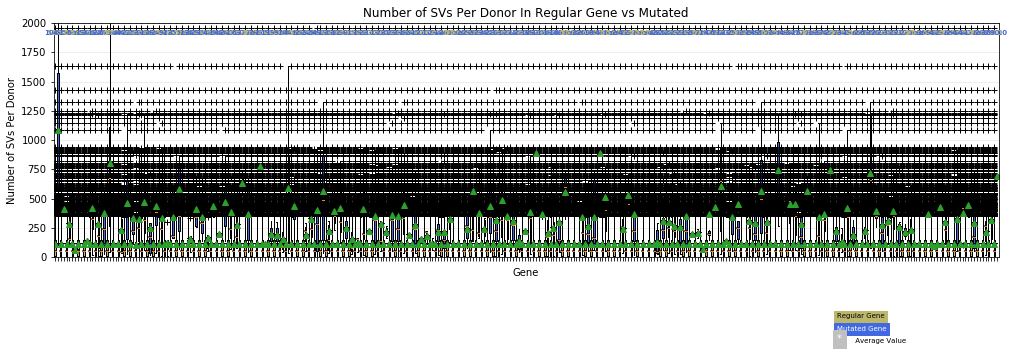

In [9]:
fig, ax1 = plt.subplots(figsize=(15, 5))
fig.canvas.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data, notch=0, sym='+', vert=1, whis=1.5, showmeans=True)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title(
    'Number of SVs Per Donor In Regular Gene vs Mutated')
ax1.set_xlabel('Gene')
ax1.set_ylabel('Number of SVs Per Donor')

# Now fill the boxes with desired colors
box_colors = ['darkkhaki', 'royalblue']
num_boxes = len(data)
medians = np.empty(num_boxes)
for i in range(num_boxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    box_coords = np.column_stack([boxX, boxY])
    # Alternate between Dark Khaki and Royal Blue
    ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 2]))
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        ax1.plot(medianX, medianY, 'k')
    medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, num_boxes + 0.5)
top = 2000
bottom = 0
ax1.set_ylim(bottom, top)
ax1.set_xticklabels(labels,
                    rotation=90, fontsize=8)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(num_boxes) + 1
upper_labels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], .95, upper_labels[tick],
             transform=ax1.get_xaxis_transform(),
             horizontalalignment='center', size='x-small',
             weight=weights[k], color=box_colors[k])

# Finally, add a basic legend
fig.text(0.80, 0.08, f'Regular Gene',
         backgroundcolor=box_colors[0], color='black', weight='roman',
         size='x-small')
fig.text(0.80, 0.045, 'Mutated Gene',
         backgroundcolor=box_colors[1],
         color='white', weight='roman', size='x-small')
fig.text(0.80, 0.015, '*', color='white', backgroundcolor='silver',
         weight='roman', size='medium')
fig.text(0.815, 0.013, ' Average Value', color='black', weight='roman',
         size='x-small')